<h1>Neural Network From Scratch with NumPy</h1>
<hr />

<h2>0. How Machines Learn</h2>

<p>When we talk about learning, we're actually talking about the process whereby one acquires new knowledge and habilities or improves on their existing skills. Usually one learns by studying or by experience, which means one <b>learns from data</b>. How can we translate this process in such a way that a machine can go through it? Humans learn naturally, it may not be a trivial task to define how to do so in a mathematical sense. Think about it for a bit.</p>

<p>We'll loosely say a machine learns a task when it gets better at it by identifying patterns from data. This process involves generalization, so the machine must perform better at the task when shown new examples.</p>

<p>Let's say we want a machine to learn to identify whether a picture is a dog or a cat, by this definition, after receiving and analyzing some data $D1$, the success rate of identification on never seen data $D2$ must improve.</p>

<p>Now we'll put this into mathematical terms.</p>
<p>An algorithm learns the function $f: X \mapsto Y$ from some data $D = \{...\}$ by using the data $D$ to pick a function $g: X \mapsto Y$ such that $g \approx f$.</p>

<p>Let's go back to the dog or cat identifier, in this case, $f: X \mapsto Y$ is a functions that receives $x$, a picture belonging to the set of all possible pictures $X$, and this functions returns $y$, a label belonging to the set of labels $Y = \{dog, cat\}$.</p>

<p align="center"><img src="images/dogcatclassifier.jpg" align="center"></p>
<p align="center"><i><a href="https://nithanaroy.medium.com/3-ways-to-design-affective-classes-in-ml-classification-algorithms-57a302e5397b">Source: 3 ways to design effective classes in ML Classification Algorithms</a></i></p>
    
<p>So, using the data $D = \{x1, x2, x3 ... xN\}$, composed by pictures of dogs and cats, our algorithm must pick $g: X \mapsto Y$, another function that also receives pictures and outputs a lable in $\{dog, cat\}$ such that our function $g$ approximates $f$, that is, it classifies cats and dogs in a picture within a defined margin of error.</p>

<h3>Supervised and Unsupervised Learning</h3>

<p>Now let's go back to our learning definition: an algorithm learns the function $f: X \mapsto Y$ from some data $D = \{...\}$ by using the data $D$ to pick a function $g: X \mapsto Y$ such that $g \approx f$. Considering the example $D = \{x1, x2, x3 ... xN\}$ where $x_i, i \in \{1, 2, 3, ..., N\}$, is a picture of a cat or a picture of a dog, we're actually performing a specific type of learning called <b>Unsupervised Learning</b>.</p>

<p><b>Unsupervised Learning</b> algorithms learn properties of the data by identifying the propability distribution or relevant features that distinguish or cluster the examples in certain classes. Notice that the machine is the one who is picking the characteristics used to classify the data.</p>

<p><b>Supervised Learning</b>, on the other hand, learns by experiencing datasets in which each example contains not only a feature, but also an associated <b>label</b> or <b>target</b>. So let's, again, go back to our learning definition and define a dataset that would allow us to perform supervised learning.</p>

<p>An algorithm learns the function $f: X \mapsto Y$ from some data $D = \{...\}$ by using the data $D$ to pick a function $g: X \mapsto Y$ such that $g \approx f$. So, to perform supervised learning, our dataset must look like this: $D = \{(x1, y1), (x2, y2), ..., (xN, yN)\}$ where $x_i, i \in \{1, 2, 3, ..., N\}$, is a picture of a cat or a picture of a dog, and $y_i, i \in \{1, 2, 3, ..., N\}$, is an associated label $: \text{label} \in \{dog, cat\}$</p>.

<p align="center"><img src="images/supervisedvsunsupervised.png" align="center"></p>
<p align="center"><i><a href="https://hal.archives-ouvertes.fr/tel-01881069/document">Source: Learning a Multiview Weighted Majority Vote Classifier: Using PAC-Bayesian Theory and Boosting</a></i></p>

<p>The images illustrate well the distintion. The supervised learning version knows the label for thes examples, so it creates a model that learns how to classify the data it has, and expects that it generalizes well for new data.</p>

<p>The unsupervised learning version, on the other hand, does not know the labels for the data, so it clusters data with similar characteristics which the machine decided to be relevant.</p>

<h3>I Want More, What's Next?</h3>

<p>We are going to focus on <b>supervised learning</b> throughout the rest of this text. The Learning problem is an extensive area with topics such as types of learning, can we learn, how to learn well and a bunch of other interesting things that we are not going to cover here.</p>

<p>The content presented so far might be just the absolute minimum so that we can go to the next topic, Neural Networks. Our intent is to use these structures called neural networks to perform machine learning. More of these basics and theoretical knowledge may be teached from neural networks perspectives.</p>

<h2>1. What is a Neural Network</h2>

<p>Let's first review what a neural network actually is. A neural network is a collection of connected nodes, with each of these nodes - or neurons - receiving an input and returning an output to the next nodes.</p>
<p>A neural network has at least 3 layers, the input layer, which contains the data to be processed; the hidden layer, which performs the main processing; and the output layer, which is the one that actually returns the output we want. Of course, we could have as many hidden layers as we want. Usually, we do not count the input layer when measuring the size of a neural network, so a neural network with one input layer, one hidden layer, and one output layer is classified as a 2 layer neural network.</p>
<p>Let's start by a simpler type of neural network, a feedforward multilayer perceptron. Feedforward means there are no cycles or loops in the network, and multilayer perceptron means each of the network's nodes is a perceptron.</p>
<p>A more graphical representation below, more on it later.</p>

<p align="center"><img src="images/neuralnetwork.png" align="center"></p><br />
<p align="center"><i><a href="https://www.astroml.org/book_figures/chapter9/fig_neural_network.html">Image Source: astroML</a></i></p>

<p>Our endgoal is to use these networks as an universal function approximator, that is, learning to approximate functions by using neural networks. That's what's called Deep Learning.</p>

<h2>2. The Perceptron</h2>

<p>Let's start by breaking this down, and defining a perceptron, or each node of the hidden layer.</p>

<p>A Perceptron is a binary classifier, that is, it receives input data, performs some computations, and finally returns a 1 or a 0.</p>

<p align="center"><img src="images/perceptron.png" align="center"></p>

<p>So we're basically taking an input vector, $x$, element-wise multiplying it by a weight vector $w$, then we sum all of these values. We'll also sum a bias $b$ to this result, and the result of these operations is what we'll cal $y$. Notice this element-wise multiplying two vectors and then summing the result is the same as computing the dot product of the vectors.</p> 
<p>To summarize this process in an equation:</p>
<p>$$y = w^T \cdot x + b$$</p>
<p>Or, more explicitly:</p>
<p>$$y = \sum_{n=1} w_{i}x_{i} + b$$</p>
<p>where $w$ and $x$ are vectors of the same length and $b$ is a real number.</p>

<p>Now, let's map this y, which has any real number as it's codomain, into the interval $[0, 1]$. To accomplish this, we'll use a function $\sigma$ whose domain is a real number, and codomain is $[0, 1]$, that is, $\sigma:\mathbb{R} \mapsto [0, 1]$.</p>
<p>We'll call this $\sigma$ function the activation function, more on activation functions later.</p>
<p>So, the output of the perceptron, $\hat{y}$, can be described as:</p>
<p>$$\hat{y} = \sigma(w^T \cdot x + b)$$</p>
<p>or</p>
<p>$$\hat{y} = \sigma(\sum_{n=1} w_{i}x_{i} + b)$$</p>
<p>Where $\sigma$ is the activation function $\sigma:\mathbb{R} \mapsto [0, 1]$, $w$ and $x$ are vectors of same length which represent respectively the weights and the inputs, and $b$ is a real number, the bias.</p>
<p>Finally, we must set a <b>treshold</b>, that is, a number that lets us map the output into actually two classes, a 1 or a 0. For now, let's just use 0.5. So, 

$$\text{if} \:\: \sigma(w^T \cdot x + b) \leq 0.5, \:\: then \:\: \hat{y} = 0 $$
$$\text{if} \:\: \sigma(w^T \cdot x + b) > 0.5, \:\: then \:\: \hat{y} = 1$$

<p>or, </p>
$$\begin{equation*}
\hat{y}=\begin{cases}
          0 \quad &\text{if} \:\: \, \sigma(w^T \cdot x + b) \leq 0.5 \\
          1 \quad &\text{if} \:\: \, \sigma(w^T \cdot x + b) > 0.5 \\
     \end{cases}
\end{equation*}$$

<p>Let's assume x is a two-dimensional vector, so $\overrightarrow{x} = (x1, x2)$, what the perceptron actually does is map a line on the plane with axis x1 and x2. For any point $p$ contained in this plane, the perceptron classifies the point $p$ as $1$ if $p$ is located above the line $\: w_{1}x_{1} + w_{2}x_{2} + b$, else, it classifies $p$ as $0$.</p>

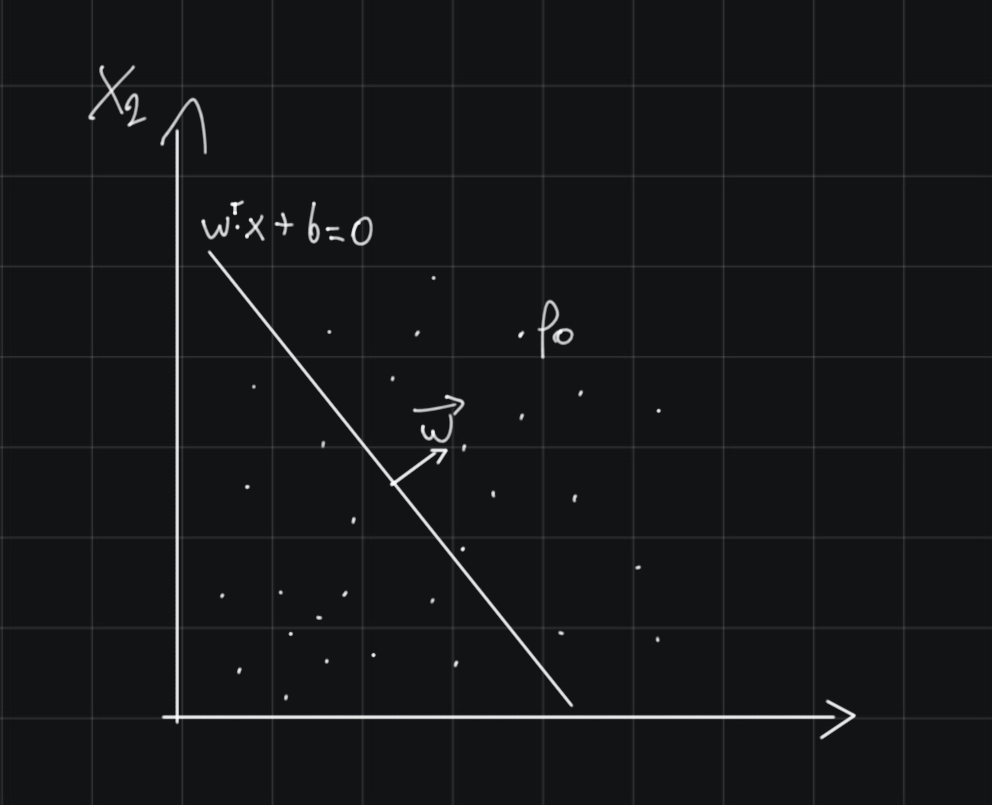

<p>If $\overrightarrow{x}$ was a three-dimensional vector, the perceptron would actually map a plane separating the space. This is generalized as: the perceptron maps a $n-1$-dimensional hyperplane on a $n$-dimensional space.</p>

<p>Now let's define a perceptron in python:</p>

In [1]:
# canonical importing
import numpy as np

We'll use the following as our activation function, more on activation functions later.

In [2]:
# defining sigmoid activation function
def sigmoid(x):
    return 1 / (1 + (np.exp(-x)))

Let's plot this function and see what it looks like:

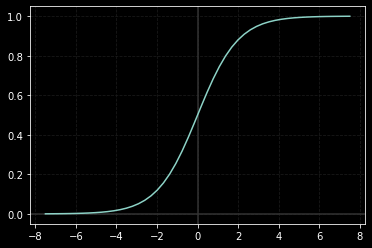

In [3]:
from numpy import linspace
from matplotlib.pyplot import plot, axhline, axvline, grid, style
style.use('dark_background')

axhline(c='.2'); axvline(color='.2')
grid(c='.1', ls='--')

# Plot across a span of numbers
z = linspace(-7.5, 7.5)
plot(z, sigmoid(z));

In [4]:
def perceptron(x, w, b=0, sigma=sigmoid):
    '''
    this function receives x and w, numpy vectors of same length and optionally b, a real number,
    and sigma, an activation function
    
    it returns a float which represents the probability that the vector is of a certain class, 1 
    '''
    return sigma(np.dot(w, x) + b)

In [5]:
my_x = np.array([1, 3, 2])
my_w = np.array([-0.5, 0.01, 0.8])
my_b = 1

y_hat = perceptron(my_x, my_w, my_b)
print('Before making it binary: {}'.format(y_hat))

if y_hat <= 0.5:
    y_hat = 0
else:
    y_hat = 1
    
print('After: {}'.format(y_hat))

Before making it binary: 0.8937850083248244
After: 1


<h2>3. Limitations of the Perceptron</h2>

<p>For now, this perceptron isn't actually learning anything, all it's doing is representing the calculations that perform the classification. Let's leave this aside for a moment and just think about what type of functions it can represent.</p>

<p>Since the perceptron maps a $n-1$-dimensional hyperplane on a $n$-dimensional space, it can only classify linearly separable data. Two sets of points $X_{0}$ and $X_{1}$ in an $n$-dimensional Euclidean space are linearly separable if there exists n + 1 real numbers $w_{1}, w_{2}, ..., w_{n}, k$ such that every point $x \in X_{0}$ satisfies $\sum_{n=1} w_{i}x_{i} > k$ and every point $x \in X_{1}$ satisfies $\sum_{n=1} w_{i}x_{i} < k$</p>

<p>That is, for two-dimensional data, the points in $X_{0}$ and the points in $X_{1}$ can be separated by a line. For $n$-dimensional data, the points in $X_{0}$ and the points in $X_{1}$ can be separated by a $n-1$-dimensional hyperplane.</p>

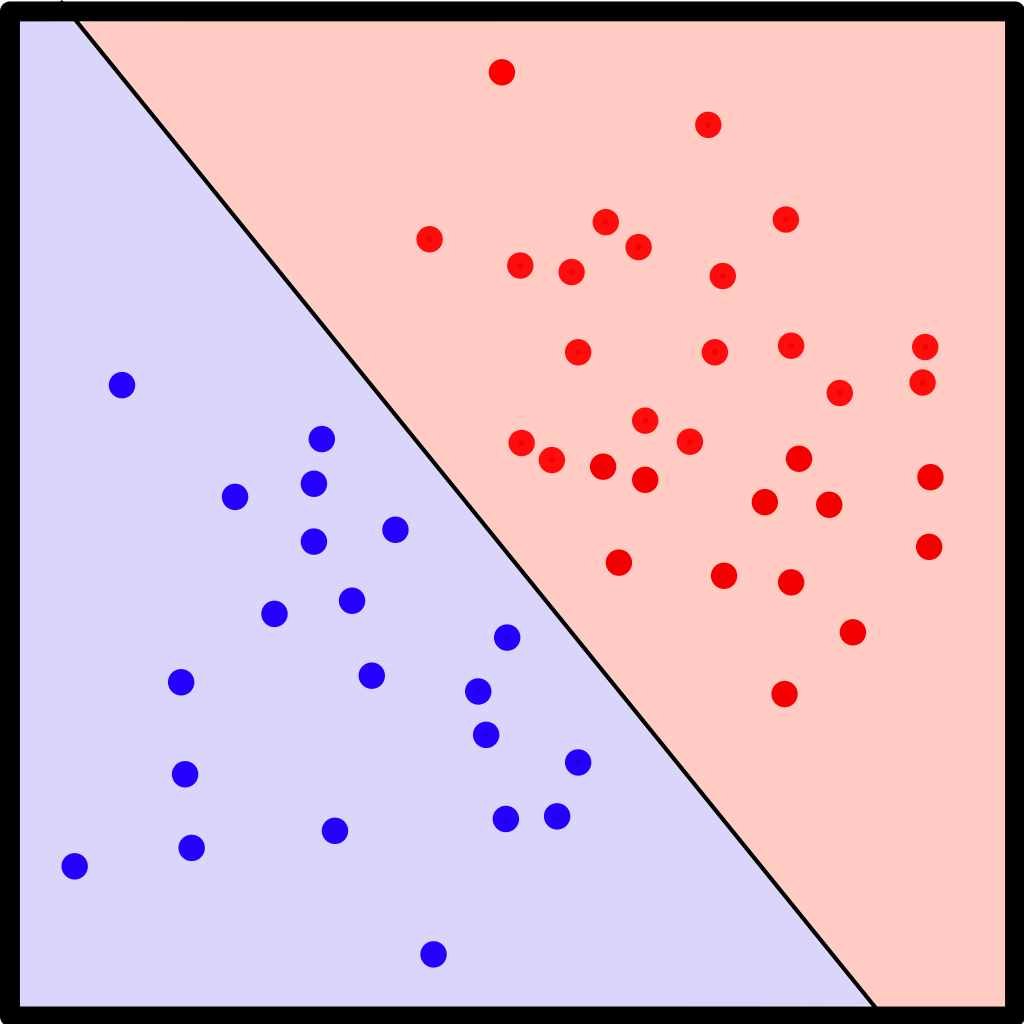

<br /> 
<h3>OR Perceptron</h3>

<p>Let's use the perceptron to represent logical disjunction (OR).</p>
<p>Given the propositions p and q, <b>p or q</b> assumes the value false if and only if p and q are both false, that is:</p>

<table border=\"1\">
    <tr>
        <th>p</th>
        <th>q</th>
        <th>p or q</th>
    </tr>
    <tr>
        <td>1</td>
        <td>1</td>
        <td>1</td>
    </tr>
    <tr>
        <td>1</td>
        <td>0</td>
        <td>1</td>
    </tr>
    <tr>
        <td>0</td>
        <td>1</td>
        <td>1</td>
    </tr>
    <tr>
        <td>0</td>
        <td>0</td>
        <td>0</td>
    </tr>
</table>

<br />
<p>As we have seen, to represent logical disjunction with a perceptron, it must be linearly separable. Let's represent it in a plane and check if the points that represent True (1) and the points that represent False (0) can be separated by a line:</p>

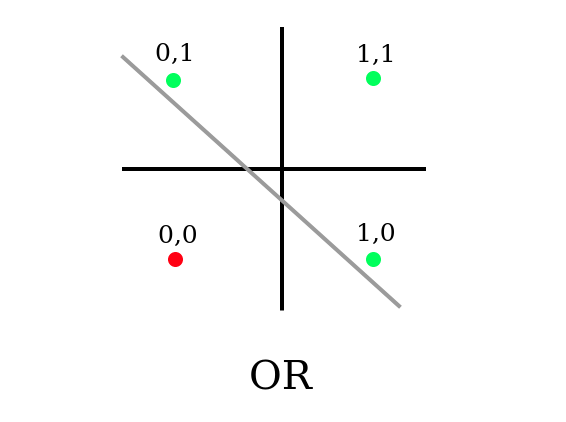

<p>Since it passes the test, let's proceed to python:</p>

In [8]:
# defining the perceptron with the treshold
def perceptron(x, w, b=0, sigma=sigmoid):
    '''
    this function receives x and w, numpy vectors of same length and optionally b, a real number,
    and sigma, an activation function
    
    it returns 1 or 0, the classification of the vector
    '''
    return int(sigma(np.dot(w, x) + b) > 0.5)

# and defining the or perceptron
def or_perceptron(x1, x2):
    w, b = np.array([1, 1]), 0
    x = np.array([x1, x2])
    
    return perceptron(x, w, b)

In [14]:
x_test = [[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]]

print('Checking OR output')
for x in x_test:
    print('{} or {} is {}'.format(x[0], x[1], or_perceptron(x[0], x[1])))

Checking OR output
0 or 0 is 0
0 or 1 is 1
1 or 0 is 1
1 or 1 is 1


<h3>XOR Problem</h3>

<p>Now let's think, can the perceptron represent exclusive disjunction (XOR)? That is:</p>

<p>Given the propositions p and q, <b>p or q</b> assumes the value false if and only if p and q are both different, that is:</p>

<table border=\"1\">
    <tr>
        <th>p</th>
        <th>q</th>
        <th>p xor q</th>
    </tr>
    <tr>
        <td>1</td>
        <td>1</td>
        <td>0</td>
    </tr>
    <tr>
        <td>1</td>
        <td>0</td>
        <td>1</td>
    </tr>
    <tr>
        <td>0</td>
        <td>1</td>
        <td>1</td>
    </tr>
    <tr>
        <td>0</td>
        <td>0</td>
        <td>0</td>
    </tr>
</table>

<br />
<p>And representing in a plane:</p>

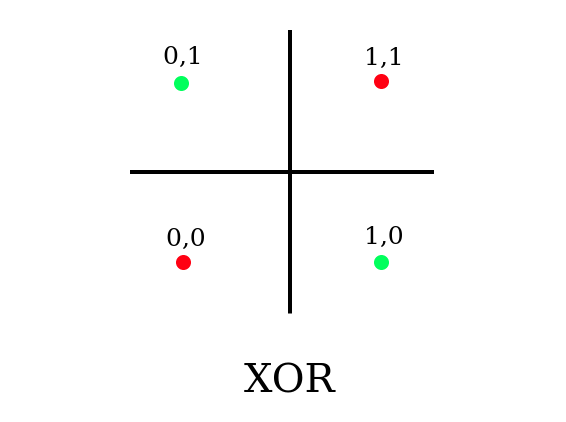

<p>As it's possible to see, a line can't separate the two classes, it doesn't matter how much we tweak the weights and bias. It might seem like the perceptron isn't much helpful for more complex datasets then, but let's not be so quick to dismiss it.</p>

<p>Combining perceptrons, we can actually represent much more sofisticated functions, let's define <b>and</b> and <b>not</b> operations, that is, conjunction and negation as perceptrons in python:</p>

In [16]:
def and_perceptron(x1, x2):
    w, b = np.array([1, 1]), -1
    x = np.array([x1, x2])
    
    return perceptron(x, w, b)

def not_perceptron(x1):
    w, b = np.array([-1]), 1
    x = np.array([x1])
    
    return perceptron(x, w, b)

<p>The XOR operator for p and q can be represented as $\text{(p and (not q)) or ((not p) and q)}$, let's take advantage of that and combine the perceptrons to represent XOR:</p>

In [24]:
def xor_neural_network(x1, x2): 
    
    xor = or_perceptron(
        and_perceptron(
            not_perceptron(x1), x2
        ), 
        
        and_perceptron(
            x1, not_perceptron(x2)
        )
    )
    
    return xor

In [25]:
print('Checking XOR output')
for x in x_test:
    print('{} xor {} is {}'.format(x[0], x[1], xor_neural_network(x[0], x[1])))

Checking XOR output
0 xor 0 is 0
0 xor 1 is 1
1 xor 0 is 1
1 xor 1 is 0


<br />
<p>As we saw before, combined perceptrons (or neurons) is what we call a neural network, more specifically a multilayer perceptron (MLP). A single neuron (perceptron) can also be called a single layer neural network, but it's less powerful in representing functions. More on neural networks later, but we can already see that even a simple linear binary classifier can be build on to represent complex representations.</p>

<h2>4. The Universal Aprroximation Theorem</h2>

<p>We saw how we can build on perceptrons to represent more complex functions that are not linearly separable, but how complex of a function can a multilayer perceptron actually represent?</p>

<p>The <b>Universal Approximation Theorem</b> (Hornik et al., 1989; Cybenko, 1989) states that - provided that the neural network has enough hidden units (neurons) - a Feedforward Neural Network with a linear output layer and at leastone hidden layer with a sigmoid activation function (such as the one we used before) can approximate any continuous function on a closed and bounded subset of $\mathbb{R}^{n}$ from one finite-dimensional space to another with any desired nonzero amount of error $\epsilon$.</p>

<p>Basically, this means that a large enough multilayer perceptron can represen any function we try to learn. Note that this does not imply we'll actually be able to learn this function, all it states is that the MLP can represent it.</p>

<p>The main idea behind this theorem is that simple manipulations can be combined to solve a complex problem.</p>

<h2>5. Optimization and The Gradient Descent</h2>

<p>So far, our neural networks are not actually learning anything, even our perceptron isn't, all they're doing is representing functions. Let's go back to our learning definition: an algorithm learns the function $f: X \mapsto Y$ from some data $D = \{...\}$ by using the data $D$ to pick a function $g: X \mapsto Y$ such that $g \approx f$.</p>